In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
m_1_d = 25
m_2_d = 150
v_1_d = 5.5
v_2_d = 10.5
N = 500

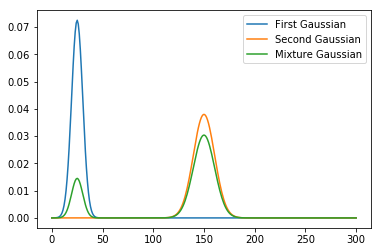

In [3]:
x = np.linspace(0,300, 300)
y_1_d = norm.pdf(x, loc=m_1_d, scale=5.5)
y_2_d = norm.pdf(x, loc=m_2_d, scale=10.5)

#Mixture of Gaussian
y_mix_d = .2 * y_1_d + .8 * y_2_d
plt.plot(x, y_1_d, label="First Gaussian")
plt.plot(x, y_2_d, label="Second Gaussian")
plt.plot(x, y_mix_d, label="Mixture Gaussian")
plt.legend()
plt.show()


In [4]:
components = np.random.choice(2, N, p=[.2, .8], replace=True)
means = np.array([m_1_d, m_2_d])
variances = np.array([v_1_d, v_2_d])

In [5]:
samples = np.random.normal(loc=means[components], scale=variances[components], size=N)

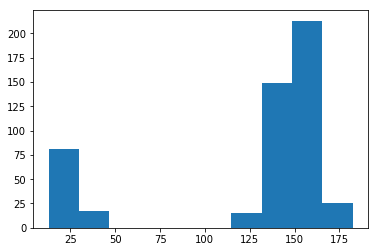

In [6]:
plt.hist(samples)
plt.show()

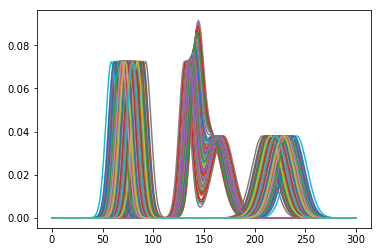

In [7]:
# Sample Intensities from Mixture of Gaussians
mu_1 = 150

intesities = []
for s in samples:
    y_1_int = norm.pdf(x, loc=mu_1 - s / 2., scale=5.5)
    y_2_int = norm.pdf(x, loc=mu_1 + s / 2., scale=10.5)
    y_mix_int = y_1_int + y_2_int
    intesities.append(y_mix_int)
    plt.plot(x, y_mix_int)
plt.show()

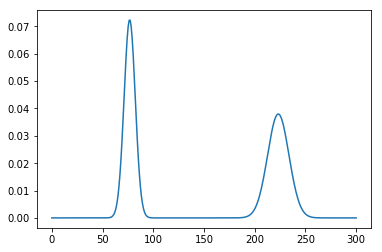

In [8]:
plt.plot(x, intesities[100])
plt.show()

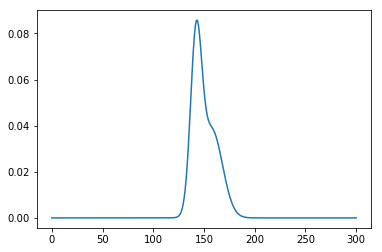

In [9]:
plt.plot(x, intesities[10])
plt.show()

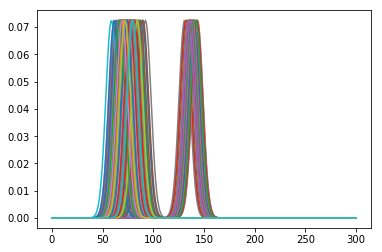

In [10]:
for s in samples:
    y_mix_int = norm.pdf(x, loc=mu_1 - s / 2., scale=5.5)
    intesities.append(y_mix_int)
    plt.plot(x, y_mix_int)
plt.show()

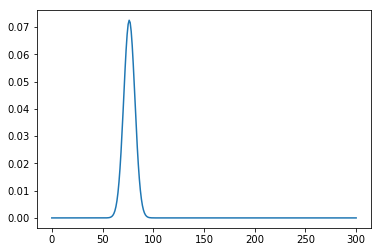

In [11]:
plt.plot(x, intesities[620])
plt.show()

In [12]:
def normalize(low=0, high=1, A=None):
    mins = np.min(A, axis=0)
    maxs = np.max(A, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - A)) / rng)

In [13]:
export = []

for sample in intesities:
    export.append(normalize(0., 1., sample))

np.savetxt('./intensity_samples.csv', export)

In [ ]:
len(export)